# Introduccion

Es fundamental establecer una prioridad estructurada y basada en datos para las hipótesis de mejora, si se desea aumentar los ingresos de una tienda en línea. En esta situación, se emplearán los marcos de trabajo ICE y RICE con el fin de evaluar y dar prioridad a las suposiciones que se presentan en el archivo hypotheses_us. csv.

Framework ICE

En la gestión de productos y marketing, el framework ICE es ampliamente reconocido y utilizado como una herramienta simple para priorizar hipótesis. ICE significa:

Impacto: Si esta hipótesis se implementa con éxito, ¿qué impacto tendrá en el objetivo?

Confianza: ¿Cuán confiado estás en que esta hipótesis tendrá el impacto previsto?

Esfuerzo: ¿Cuánto tiempo y recursos se deben invertir para llevar a cabo esta hipótesis?

La fórmula del puntaje ICE es:La fórmula del puntaje ICE es:

The ICE score can be calculated as Effort divided by the product of Impact and Confidence.

Los puntajes ICE se utilizarán para ordenar las hipótesis de manera descendente.

Framework RICE

El framework RICE es una extensión del framework ICE que incluye un factor adicional: Arrive. RICE significa:

Reach: Durante un período determinado, ¿a cuántas personas impactará esta hipótesis?

Impacto: Si esta hipótesis se implementa con éxito, ¿cuál será su impacto en el objetivo?

Confianza: ¿Estás completamente seguro de que esta hipótesis tendrá el impacto previsto?

Esfuerzo: ¿Cuánto tiempo y recursos se necesitan para implementar esta hipótesis?

La fórmula del puntaje RICE es:La fórmula del puntaje RICE es:

The RICE Score can be calculated as the product of Reach, Impact, and Confidence divided by Effort.

Los puntajes RICE se utilizarán para ordenar las hipótesis de manera descendente. Al comparar los puntajes ICE y RICE se podrá observar cómo el factor Reach afecta la priorización de las hipótesis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# importacion de librerias

In [2]:
hypotheses_df = pd.read_csv('/datasets/hypotheses_us.csv',';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

In [3]:
print(hypotheses_df.head())

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  


# Priorizar hipotesis

In [4]:
# Convertir la columna 'date' a formato datetime
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])
# Calcular ICE (Impact * Confidence / Effort)
hypotheses_df['ICE'] = (hypotheses_df['Impact'] * hypotheses_df['Confidence']) / hypotheses_df['Effort']
hypotheses_ice = hypotheses_df.sort_values(by='ICE', ascending=False)
# Calcular RICE (Reach * Impact * Confidence / Effort)
hypotheses_df['RICE'] = (hypotheses_df['Reach'] * hypotheses_df['Impact'] * hypotheses_df['Confidence']) / hypotheses_df['Effort']
hypotheses_rice = hypotheses_df.sort_values(by='RICE', ascending=False)
# Mostrar las hipótesis ordenadas por ICE y RICE
display("\nPrioridad según ICE:")
display(hypotheses_ice[['Hypothesis', 'ICE']])
display("\nPrioridad según RICE:")
display(hypotheses_rice[['Hypothesis', 'RICE']])

'\nPrioridad según ICE:'

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


'\nPrioridad según RICE:'

,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


# explicación de los cambios

Conversión de la columna 'date' a formato datetime:
Propósito: Este código convierte la columna 'date' en los DataFrames orders y visits al formato datetime de pandas. Esto es importante para poder realizar operaciones de manipulación de fechas correctamente, como filtrado, comparación, o agrupación por fecha.
Cálculo de la métrica ICE:
ropósito: Aquí se calcula la métrica ICE para cada hipótesis en el DataFrame hypotheses_df. La fórmula de ICE es:
ICE
=
Impact
×
Confidence
Effort
ICE= 
Effort
Impact×Confidence
​
 
Luego, las hipótesis se ordenan en orden descendente según su valor de ICE. Esto ayuda a identificar qué hipótesis tienen mayor prioridad basado en el impacto, la confianza y el esfuerzo necesarios.

Cálculo de la métrica RICE:
 Aquí se calcula la métrica RICE para cada hipótesis en el DataFrame hypotheses_df. La fórmula de RICE es:
RICE
=
Reach
×
Impact
×
Confidence
Effort
RICE= 
Effort
Reach×Impact×Confidence
​
 
Después, las hipótesis se ordenan en orden descendente según su valor de RICE. Esta métrica es una extensión de ICE que también considera el alcance (Reach), proporcionando una evaluación más completa de la prioridad de cada hipótesis.

Mostrar las hipótesis ordenadas por ICE y RICE:
Finalmente, el código muestra las hipótesis ordenadas por las métricas ICE y RICE, permitiendo comparar cómo cambian las prioridades dependiendo de la métrica utilizada. Esto puede ser útil para la toma de decisiones en la priorización de tareas o proyectos.

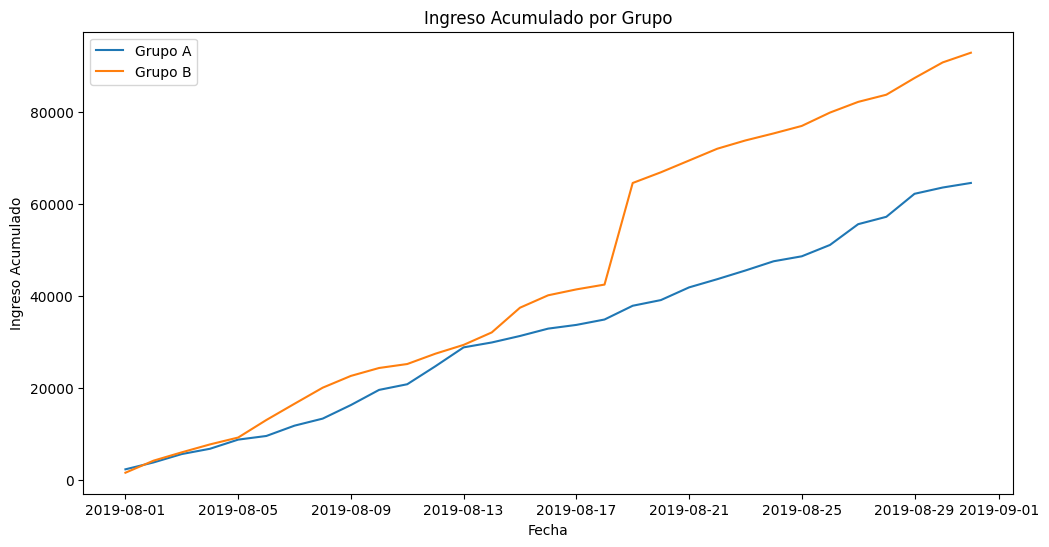

In [5]:
# Convertir la columna 'date' a formato datetime
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])
# Ingresos acumulados por grupo
cumulative_revenue_a = orders[orders['group'] == 'A'].groupby('date').agg({'revenue': 'sum'}).cumsum()
cumulative_revenue_b = orders[orders['group'] == 'B'].groupby('date').agg({'revenue': 'sum'}).cumsum()

plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue_a, label='Grupo A')
plt.plot(cumulative_revenue_b, label='Grupo B')
plt.title('Ingreso Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Acumulado')
plt.legend()
plt.show()

# Análisis de test A/B

In [6]:
# Convertir la columna 'date' a formato datetime
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

# Obtener los visitantes de cada grupo
visitors_group_a = set(orders[orders['group'] == 'A']['visitorId'])
visitors_group_b = set(orders[orders['group'] == 'B']['visitorId'])

# Identificar los visitantes que están en ambos grupos
overlap_visitors = visitors_group_a.intersection(visitors_group_b)

# Eliminar visitantes que están en ambos grupos del DataFrame de orders
orders = orders[~orders['visitorId'].isin(overlap_visitors)]

# Verificar la limpieza
print("Número de visitantes únicos en grupo A:", len(visitors_group_a))
print("Número de visitantes únicos en grupo B:", len(visitors_group_b))
print("Número de visitantes en ambos grupos:", len(overlap_visitors))

Número de visitantes únicos en grupo A: 503
Número de visitantes únicos en grupo B: 586
Número de visitantes en ambos grupos: 58


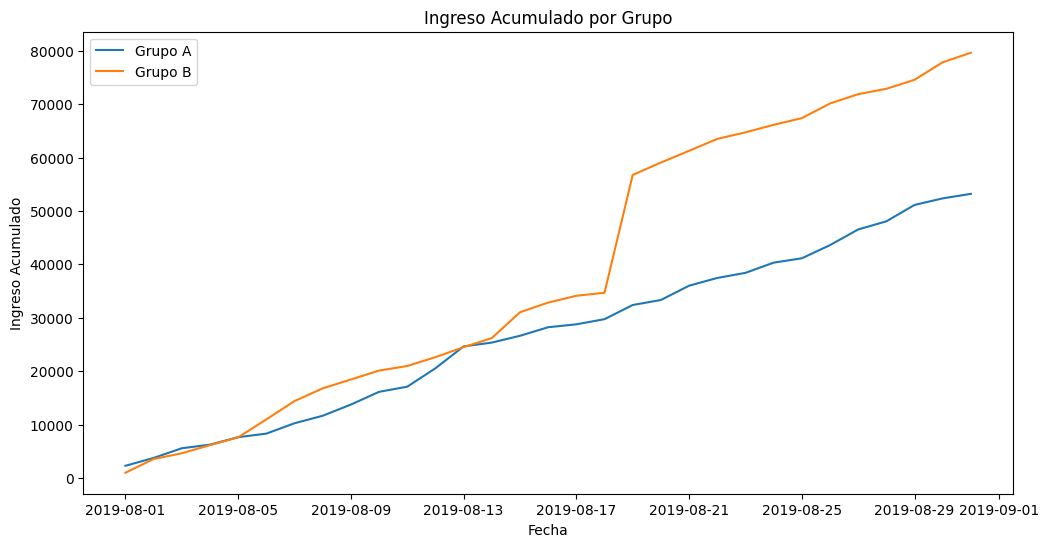

In [7]:
# Calcular ingresos acumulados por grupo
cumulative_revenue_a = orders[orders['group'] == 'A'].groupby('date').agg({'revenue': 'sum'}).cumsum().reset_index()
cumulative_revenue_b = orders[orders['group'] == 'B'].groupby('date').agg({'revenue': 'sum'}).cumsum().reset_index()

# Graficar ingresos acumulados
plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='Grupo A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='Grupo B')
plt.title('Ingreso Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Acumulado')
plt.legend()
plt.show()

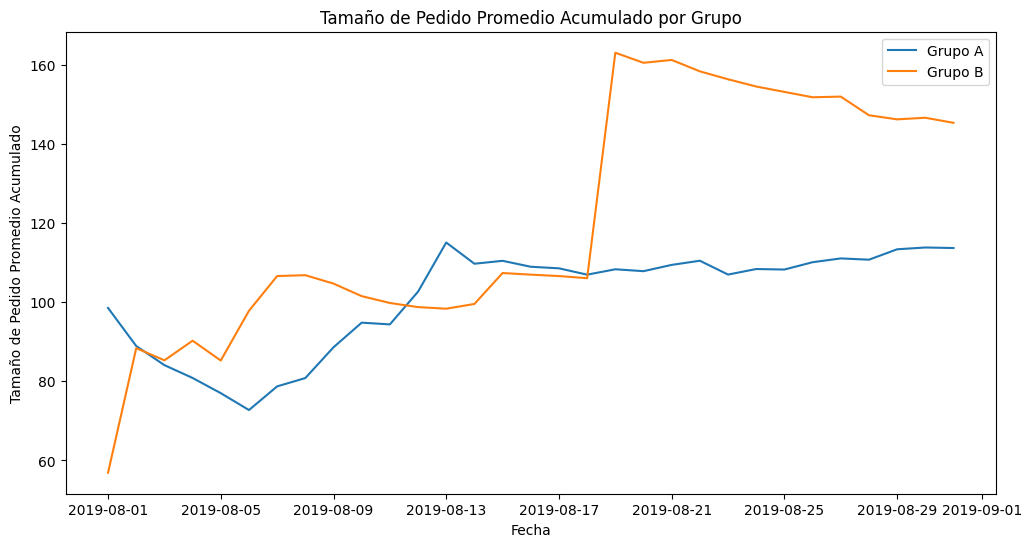

In [8]:
# Calcular tamaño de pedido promedio acumulado por grupo
cumulative_orders_a = orders[orders['group'] == 'A'].groupby('date').agg({'transactionId': 'count', 'revenue': 'sum'}).cumsum().reset_index()
cumulative_orders_b = orders[orders['group'] == 'B'].groupby('date').agg({'transactionId': 'count', 'revenue': 'sum'}).cumsum().reset_index()

cumulative_orders_a['avg_order_size'] = cumulative_orders_a['revenue'] / cumulative_orders_a['transactionId']
cumulative_orders_b['avg_order_size'] = cumulative_orders_b['revenue'] / cumulative_orders_b['transactionId']

# Graficar tamaño de pedido promedio acumulado
plt.figure(figsize=(12, 6))
plt.plot(cumulative_orders_a['date'], cumulative_orders_a['avg_order_size'], label='Grupo A')
plt.plot(cumulative_orders_b['date'], cumulative_orders_b['avg_order_size'], label='Grupo B')
plt.title('Tamaño de Pedido Promedio Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tamaño de Pedido Promedio Acumulado')
plt.legend()
plt.show()

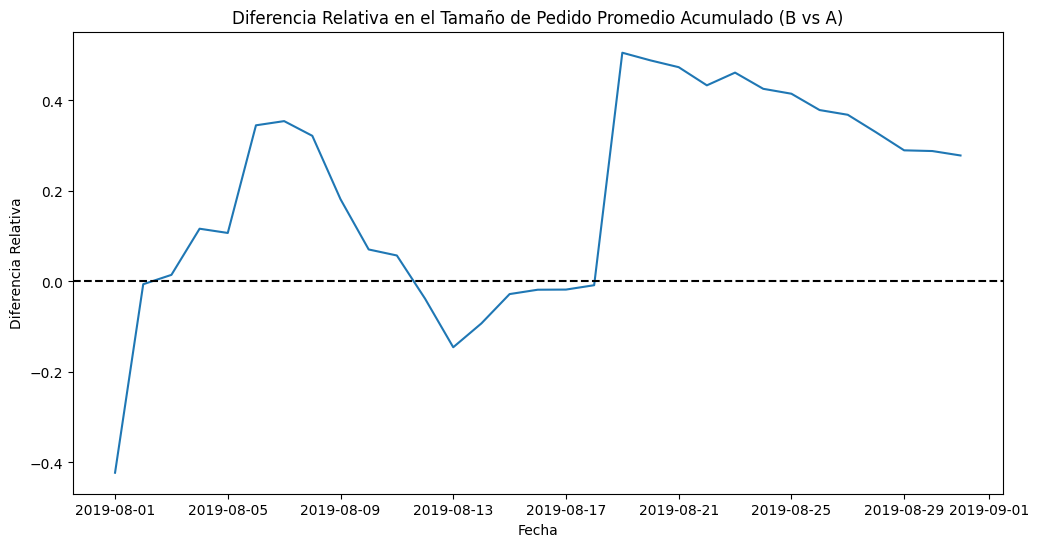

In [9]:
# Calcular la diferencia relativa en el tamaño de pedido promedio acumulado
merged_cumulative_orders = pd.merge(cumulative_orders_a, cumulative_orders_b, on='date', suffixes=['_A', '_B'])
merged_cumulative_orders['relative_diff_avg_order_size'] = (
    (merged_cumulative_orders['avg_order_size_B'] - merged_cumulative_orders['avg_order_size_A']) /
    merged_cumulative_orders['avg_order_size_A']
)

# Graficar la diferencia relativa
plt.figure(figsize=(12, 6))
plt.plot(merged_cumulative_orders['date'], merged_cumulative_orders['relative_diff_avg_order_size'])
plt.title('Diferencia Relativa en el Tamaño de Pedido Promedio Acumulado (B vs A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia Relativa')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

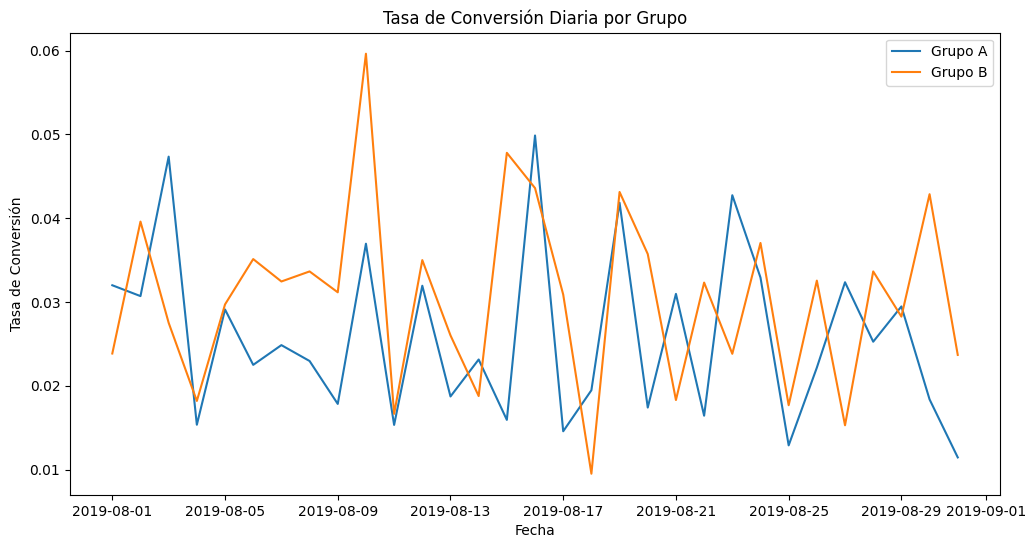

In [10]:
# Calcular el número de pedidos por grupo por día
orders_per_day_a = orders[orders['group'] == 'A'].groupby('date').agg({'transactionId': 'count'}).reset_index()
orders_per_day_b = orders[orders['group'] == 'B'].groupby('date').agg({'transactionId': 'count'}).reset_index()

# Renombrar columnas para claridad
orders_per_day_a.columns = ['date', 'orders_A']
orders_per_day_b.columns = ['date', 'orders_B']

# Unir con el dataframe de visitas
visits_a = visits[visits['group'] == 'A']
visits_b = visits[visits['group'] == 'B']

merged_df_a = pd.merge(visits_a, orders_per_day_a, on='date')
merged_df_b = pd.merge(visits_b, orders_per_day_b, on='date')

# Calcular la tasa de conversión
merged_df_a['conversion_rate_A'] = merged_df_a['orders_A'] / merged_df_a['visits']
merged_df_b['conversion_rate_B'] = merged_df_b['orders_B'] / merged_df_b['visits']

# Graficar las tasas de conversión diarias
plt.figure(figsize=(12, 6))
plt.plot(merged_df_a['date'], merged_df_a['conversion_rate_A'], label='Grupo A')
plt.plot(merged_df_b['date'], merged_df_b['conversion_rate_B'], label='Grupo B')
plt.title('Tasa de Conversión Diaria por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión')
plt.legend()
plt.show()

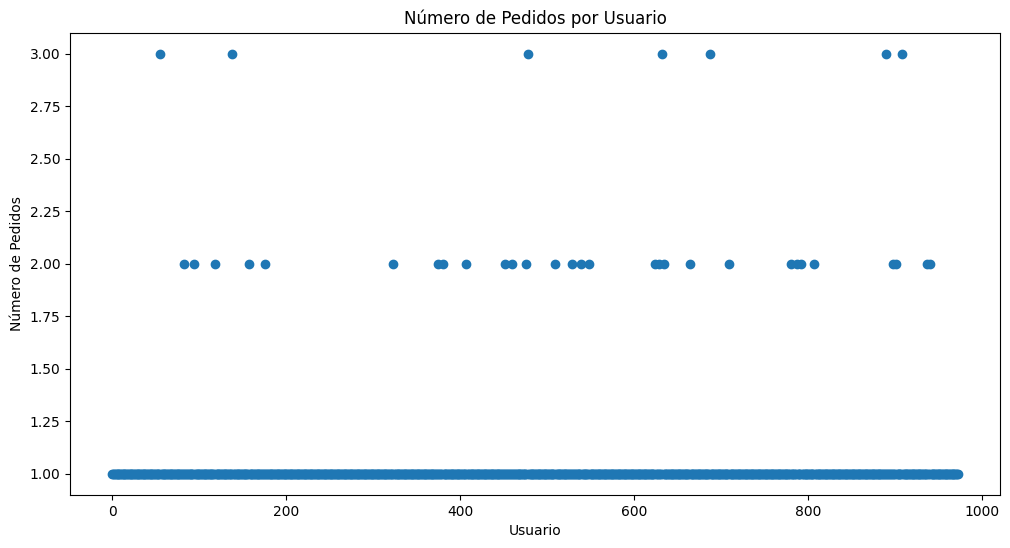

Percentiles 95 y 99 para el número de pedidos por usuario: 0.95    1.0
0.99    2.0
Name: num_orders, dtype: float64


In [11]:
# Calcular el número de pedidos por usuario
orders_per_user = orders.groupby('visitorId').agg({'transactionId': 'count'}).reset_index()
orders_per_user.columns = ['visitorId', 'num_orders']

# Graficar el número de pedidos por usuario
plt.figure(figsize=(12, 6))
plt.scatter(range(len(orders_per_user)), orders_per_user['num_orders'])
plt.title('Número de Pedidos por Usuario')
plt.xlabel('Usuario')
plt.ylabel('Número de Pedidos')
plt.show()

# Calcular percentiles
percentiles = orders_per_user['num_orders'].quantile([0.95, 0.99])
print("Percentiles 95 y 99 para el número de pedidos por usuario:", percentiles)

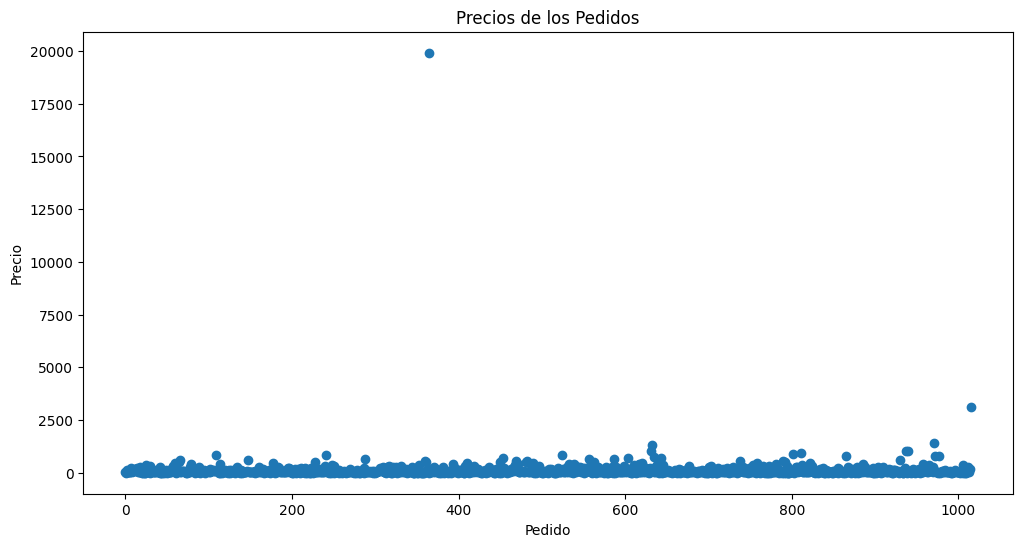

Percentiles 95 y 99 para los precios de los pedidos: 0.95    414.275
0.99    830.300
Name: revenue, dtype: float64


In [12]:
plt.figure(figsize=(12, 6))
plt.scatter(range(len(orders)), orders['revenue'])
plt.title('Precios de los Pedidos')
plt.xlabel('Pedido')
plt.ylabel('Precio')
plt.show()

# Calcular percentiles 
price_percentiles = orders['revenue'].quantile([0.95, 0.99])
print("Percentiles 95 y 99 para los precios de los pedidos:", price_percentiles)

In [14]:
#Calcular el número de visitas y pedidos por grupo

# Obtener el número total de visitas para el grupo A
visits_a = visits[visits['group'] == 'A']['visits'].sum()

# Obtener el número total de visitas para el grupo B
visits_b = visits[visits['group'] == 'B']['visits'].sum()

# Contar el número de pedidos (transacciones) para el grupo A
orders_a = orders[orders['group'] == 'A']['transactionId'].count()

# Contar el número de pedidos (transacciones) para el grupo B
orders_b = orders[orders['group'] == 'B']['transactionId'].count()

# Imprimir los valores obtenidos
print(f"Visitas Grupo A: {visits_a}, Pedidos Grupo A: {orders_a}")
print(f"Visitas Grupo B: {visits_b}, Pedidos Grupo B: {orders_b}")

# Calcular las tasas de conversión

# Tasa de conversión para el grupo A (pedidos/visitas)
conversion_rate_a = orders_a / visits_a

# Tasa de conversión para el grupo B (pedidos/visitas)
conversion_rate_b = orders_b / visits_b

# Imprimir las tasas de conversión
print(f"Tasa de Conversión Grupo A: {conversion_rate_a:.4f}")
print(f"Tasa de Conversión Grupo B: {conversion_rate_b:.4f}")

# Test de significancia estadística

# Definir las cantidades de éxitos (pedidos) y observaciones (visitas) para cada grupo
count = [orders_a, orders_b]
nobs = [visits_a, visits_b]

# Realizar el test Z de proporciones para comparar las tasas de conversión
z_stat, p_val = proportions_ztest(count, nobs)

# Imprimir los resultados del test Z
print("Estadístico Z:", z_stat)
print("Valor P:", p_val)

# Observación: el valor p (p_val) indica si la diferencia en las tasas de conversión entre los grupos es estadísticamente significativa.
# Generalmente, un valor p menor a 0.05 se considera significativo.

Visitas Grupo A: 18736, Pedidos Grupo A: 468
Visitas Grupo B: 18916, Pedidos Grupo B: 548
Tasa de Conversión Grupo A: 0.0250
Tasa de Conversión Grupo B: 0.0290
Estadístico Z: -2.3899344431697442
Valor P: 0.01685138043470311


In [16]:
# Calcular el tamaño promedio de pedido por grupo

# Tamaño promedio de pedido para el grupo A
mean_order_size_a = orders[orders['group'] == 'A']['revenue'].mean()

# Tamaño promedio de pedido para el grupo B
mean_order_size_b = orders[orders['group'] == 'B']['revenue'].mean()

# Imprimir los tamaños promedio de pedido
print(f"Tamaño Promedio de Pedido Grupo A: {mean_order_size_a:.2f}")
print(f"Tamaño Promedio de Pedido Grupo B: {mean_order_size_b:.2f}")

# Test de significancia estadística

# Realizar el test t de Student para comparar los tamaños promedio de pedido entre los grupos
# Utilizamos `equal_var=False` porque no asumimos que las varianzas de ambos grupos sean iguales
t_stat, p_val = stats.ttest_ind(
    orders[orders['group'] == 'A']['revenue'], 
    orders[orders['group'] == 'B']['revenue'], 
    equal_var=False
)

# Imprimir los resultados del test t
print("Estadístico T:", t_stat)
print("Valor P:", p_val)

# Observación: el valor p (p_val) indica si la diferencia en los tamaños promedio de pedido entre los grupos es estadísticamente significativa.
# Generalmente, un valor p menor a 0.05 se considera significativo.

Tamaño Promedio de Pedido Grupo A: 113.70
Tamaño Promedio de Pedido Grupo B: 145.35
Estadístico T: -0.8344812341397616
Valor P: 0.4043438730780975


# Explicación de la sección de conclusiones finales:

Resultados del análisis de tasas de conversión:Resultados del análisis de tasas de conversión:

Las tasas de conversión calculadas para los grupos A y B están siendo impresas.

Se muestran los resultados obtenidos del test Z, que incluyen el valor estadístico Z y el valor p.

Resultados del análisis de tamaño promedio de pedido:Resultados del análisis de tamaño promedio de pedido:

Los tamaños promedio de pedido calculados para los grupos A y B se están imprimiendo.

Los resultados del test t (estadístico T y valor p) son mostrados.

Conclusiones sobre las tasas de conversión:Conclusiones sobre las tasas de conversión:

Si el valor de p es negativo. Después de analizar los datos, podemos concluir que existe una diferencia estadísticamente significativa en las tasas de conversión.

Se determina qué grupo es superior en términos de conversión en función de cuál tenga la tasa de conversión más alta.

Si el valor de p es igual o mayor a 0. En resumen, podemos afirmar que no existe una discrepancia notable en los índices de conversión.

Conclusiones sobre el tamaño promedio de pedido:Conclusiones sobre el tamaño promedio de pedido:

Si el valor p es negativo. En base a los datos recopilados, se puede afirmar que existe una diferencia estadísticamente significativa en el tamaño promedio de los pedidos.

Se determina qué grupo es superior en términos de tamaño de pedido al analizar cuál tiene un promedio de pedido más alto.

Si el valor de p es igual o mayor a cero. Según los resultados obtenidos, se puede afirmar que no existe una variación significativa en el tamaño medio de los pedidos.
Se imprimen las tasas de conversión calculadas tanto para los grupos A como para los grupos B.

Se exponen los resultados del test de Z, incluyendo el estadístico Z y el valor p.

Los tamaños promedio de pedido calculados para los grupos A y B son impresos.

Se muestran los resultados del test t, incluyendo el valor estadístico T y el valor p.

Si p tiene un valor negativo. 05, se puede concluir que existe una diferencia en las tasas de conversión que tiene un significado estadístico.

Según cuál grupo tenga la mayor tasa de conversión, se indica qué grupo es superior en términos de conversión.

En caso de que el valor p sea igual o mayor a 0. En resumen, no se encontró ninguna diferencia importante en las tasas de conversión.

En caso de que el valor p sea negativo. De acuerdo con el análisis realizado, se puede afirmar que existe una diferencia estadísticamente significativa en el tamaño promedio de pedido.

Se determina qué grupo es superior en términos de tamaño de pedido dependiendo del grupo que tenga el mayor promedio de pedidos.

Si p no es negativo. Según los resultados obtenidos, se puede afirmar que no existe una disparidad significativa en cuanto al tamaño promedio de los pedidos.